# **FINAL PROJECT**
Matthew Wu, Michael Rodriguez, Colton Lapp


**Import Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import numpy as np
import plotly.offline as py
import math
import plotly.express as px

**Set up directories**

In [2]:
#Set up directories
#base_dir = '/drive/My Drive/2022_FALL/final_project/'
base_dir = ''
raw_dir = ''
save_dir = ''
final_dir = ''

**Read in Final Datasets**

In [3]:
#Load final datsets
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True) #Do this once only
#drive.mount('/content/drive') 

global_df = pd.read_csv(base_dir + final_dir +'global_df.csv' )
country_df= pd.read_csv(base_dir + final_dir +'country_df.csv' )
sector_emissions= pd.read_csv(base_dir + final_dir +'sector_df.csv' )

crosswalk = pd.read_csv( base_dir + save_dir + 'iso_countryname_continent.csv',
                        encoding = "ISO-8859-1")

#Make sure dates are correct format
global_df['Date'] = pd.to_datetime(global_df['Date'] )
country_df['Date'] = pd.to_datetime(country_df['Date'] )


### Create Graphs

**Overview Section - Sea level rise, glacier size, co2 emissions**

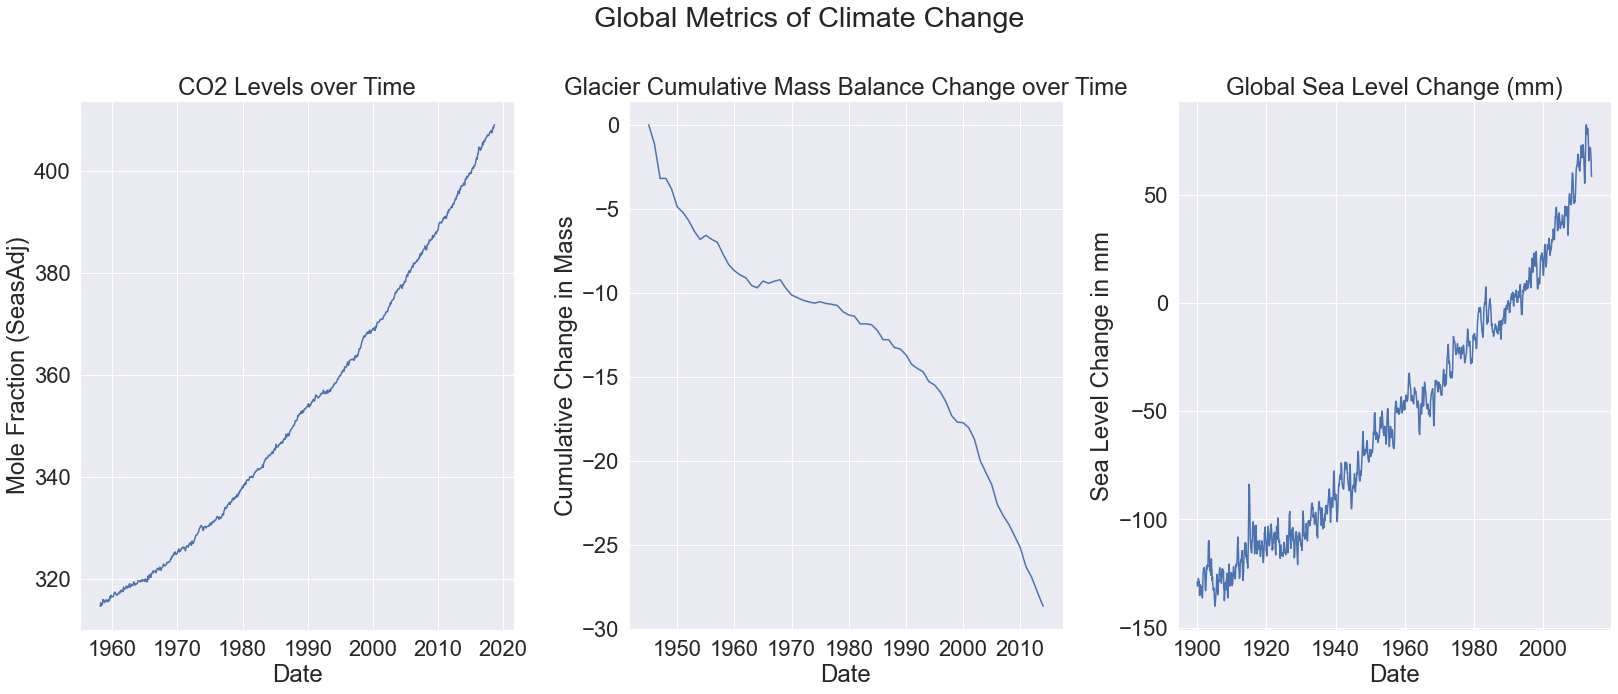

In [23]:
#Sea level rise, glacier size, co2 emissions

#Create subplot for figures
fig, axes = plt.subplots(1, 3, figsize=(23, 10))
sns.set(font_scale=2)
fig.suptitle('Global Metrics of Climate Change')

#Plot 1 - CO2 level
sns.lineplot(ax=axes[0], x='Date', y='CO2_level_SeasAdj_MoleFraction', data=global_df)
axes[0].set_title('CO2 Levels over Time')
axes[0].set( ylabel='Mole Fraction (SeasAdj)')

#Plot 2 - Glacier Mass
sns.lineplot(ax=axes[1], x='Date', y='glacier_cumulative_mass_balance', data=global_df)
axes[1].set_title('Glacier Cumulative Mass Balance Change over Time')
axes[1].set( ylabel='Cumulative Change in Mass')

#Plot 3 - Sea Level Rise
sns.lineplot(ax=axes[2], x='Date', y='global_sea_level_mm', data=global_df)
axes[2].set_title('Global Sea Level Change (mm)')
axes[2].set( ylabel='Sea Level Change in mm')
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.85)


# **Past of Climate Change**

**Graph 1: Stacked Area chart of total emissions**

In [12]:
#Create stacked area chart

#Add continent and regional data to main country dataframe for aggregation
country_cw = pd.merge(country_df, crosswalk,  how='left', left_on=['Country'], right_on = ['iso_code'])

#Get Africa df by itself and aggregate it
africa = country_cw[country_cw['continent']=='Africa'][['Date', 'CO2_emission_total']]
africa = africa.fillna(0).groupby('Date').sum()
africa['Country'] = 'AFRICA'
africa['Date'] = africa.index
africa = africa.reset_index(drop=True)

#Get southeast asia by itself, aggregate it
se_asia = country_cw[country_cw['continent']=='South-eastern Asia'][['Date', 'CO2_emission_total']]
se_asia = africa.fillna(0).groupby('Date').sum()
se_asia['Country'] = 'SE ASIA'
se_asia['Date'] = se_asia.index
se_asia = se_asia.reset_index(drop=True)

#Define our overarching country list
country_list = ['CHN', 'USA', 'RUS', 'IND', 'AFRICA', 'SE ASIA']
country_name= ['China', 'USA', 'Russia', 'India', 'Africa', 'SE Asia']
colors = ['F7B801', '007EA7', 'D7263D', 'C69C72', '4C1E4F', '35CE8D']


#get subset of df
subset = country_df[ country_df['Country'].isin(country_list)][['Date', 'CO2_emission_total', 'Country']]

#Join africa, asia, and regular tables together
pd.set_option('display.min_rows', 500)
subset = pd.concat([subset, africa, se_asia])
subset = subset[ pd.DatetimeIndex(subset['Date']).month == 1 ] 

#create pivot table to get values of each countries emissions per year
table = pd.pivot_table(subset, values='CO2_emission_total', index=['Date'], columns=['Country'])
table = table.replace( 0, np.nan)
table = table.dropna()


# ---- plot stacked area over time using pivot table --- #

#Drop between 1920-2014
date1 = pd.to_datetime( '1920-01-01'); date2 =pd.to_datetime( '2015-01-01'); 
subset = subset[ (subset['Date']>date1) & (subset['Date'] < date2 )   ]

#Replace ISO codes to names 
subset = subset.replace(to_replace= country_list, 
                                        value=country_name)

#Create color map for countries
col_map = {"China": "#F7B801", "India": "#C69C72", 
           "USA":"#007EA7", "Russia": "#D7263D",
           'Africa':'#4C1E4F', 'SE Asia':'#35CE8D'} 

country_list = ['CHN', 'USA', 'RUS', 'IND', 'AFRICA', 'SE ASIA']
country_name= ['China', 'USA', 'Russia', 'India', 'Africa', 'SE Asia']
colors = ['F7B801', '007EA7', 'D7263D', 'C69C72', '4C1E4F', '35CE8D']

#Plotly Stacked Area plot
fig = px.area( subset, x="Date", y="CO2_emission_total", color="Country", line_group="Country", 
              color_discrete_map = col_map,
              labels=dict( CO2_emission_total ="Total Emissions"),
             category_orders = {'Country': ['USA', 'China', 'Russia', 'India', 'Africa', 'SE Asia']})

#Update legend position
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()


**Graph 2: Time Series CO2 Emissions per Capita Over Time**

C:\Users\michael.r\AppData\Local\Temp\ipykernel_15628\1291048325.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\michael.r\AppData\Local\Temp\ipykernel_15628\1291048325.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



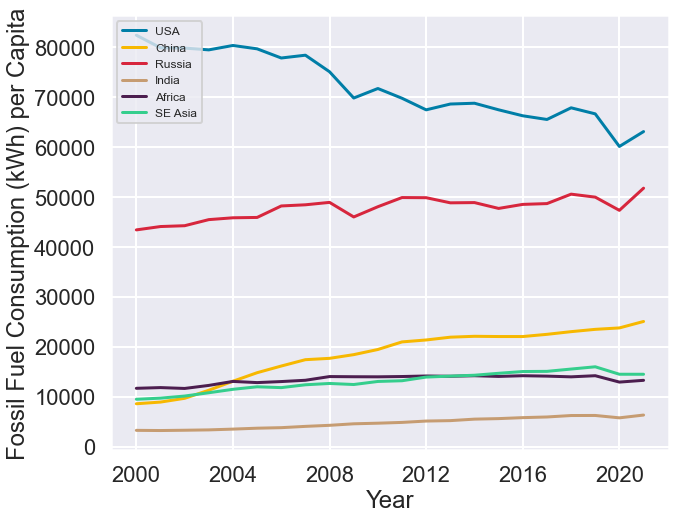

In [13]:

#Crosswalk the country dataframe and add in region/continent info again
country_cw = pd.merge(country_df, crosswalk,  how='left', left_on=['Country'], right_on = ['iso_code'])


#Replace Africa and SoutEast asia IOS's by continent name
country_cw['Country'][ country_cw['continent']== 'Africa' ]  = 'AFRICA'
country_cw['Country'][ (country_cw['region_1']=='South-eastern Asia') & (country_cw['Country']!='SGP' )] = 'SE ASIA'

#Group by country and date and get mean of emissions per capita using groupby
country_list = ['CHN', 'IND', 'RUS', 'USA', 'AFRICA', 'SE ASIA']
country_name= ['China', 'USA', 'Russia', 'India', 'Africa', 'SE Asia']
country_mean = country_cw[ country_cw['Country'].isin(country_list)][['Date', 'Country', 'fossil_energy_per_capita']].groupby(['Country', 'Date']).mean().reset_index()

#Drop earlier than 2000 and keep only yearly data (January)
country_mean = country_mean[ country_mean['Date'].dt.year >= 2000] 
country_mean = country_mean[ country_mean['Date'].dt.month == 1] 

#Replace ISO codes to country name

#Country list and colors
country_list = ['CHN', 'USA', 'RUS', 'IND', 'AFRICA', 'SE ASIA']
country_name= ['China', 'USA', 'Russia', 'India', 'Africa', 'SE Asia']
colors = ['F7B801', '007EA7', 'D7263D', 'C69C72', '4C1E4F', '35CE8D']

#Define our overarching country list
country_mean = country_mean.replace(to_replace= country_list, 
                                        value=country_name )
    


#Create Figure
sns.set(style="whitegrid")
sns.set(context='poster')

fig = plt.figure( figsize=(10, 8) )
sns.lineplot(data=country_mean, x='Date', y='fossil_energy_per_capita', 
             hue='Country', hue_order= ['USA', 'China', 'Russia', 'India', 'Africa', 'SE Asia'],
            palette = {"China": "#F7B801", "India": "#C69C72", "USA": "#007EA7",
                       "Russia": "#D7263D", 'India':'#C69C72', 'Africa':'#4C1E4F', 'SE Asia': '#35CE8D'})
plt.xlabel('Year'); plt.ylabel('Fossil Fuel Consumption (kWh) per Capita')
plt.legend(loc=2, prop={'size': 12})

plt.show()


**Graph 3: Scatterplot of Emissions per Capita vs GDP per Capita**

In [25]:
#Correlation of current GDP to total emissions

## -- Create dataframe for this -- ##

#calculate total emissions over time per country, get population and GDP
tot_emissions = pd.DataFrame( columns = ['Country', 'Total Emissions per Capita', 'Population (Mil)', 'gdp', 'gdp/cap'] )
for c in country_df['Country'].unique().tolist():
    try:
        #Get total emissions over time for country
        tlt_e = country_df[country_df['Country'] == c ]['CO2_emission_total'].sum()

        #Create subset of pop and gdp
        pop_gdp_df = country_df[country_df['Country'] == c ][['Date', 'population', 'gdp' ]]
        pop_gdp_df.sort_values(by='Date',  inplace=True)

        #Get  index value for most recent population data point
        pop  = pop_gdp_df['population'][ pop_gdp_df[['population']].last_valid_index() ]
        gdp = pop_gdp_df['gdp'][ pop_gdp_df[['gdp']].last_valid_index() ]

        tot_emissions = pd.concat(  [tot_emissions, pd.DataFrame( {'Country': [c], 'Total Emissions per Capita':[round(1000*tlt_e/pop)],
                                                                  'Population (Mil)':[round(pop/1000000, 1)], 'gdp':[gdp], 'gdp/cap':[gdp/pop]} ) ] )
    except:
        None;



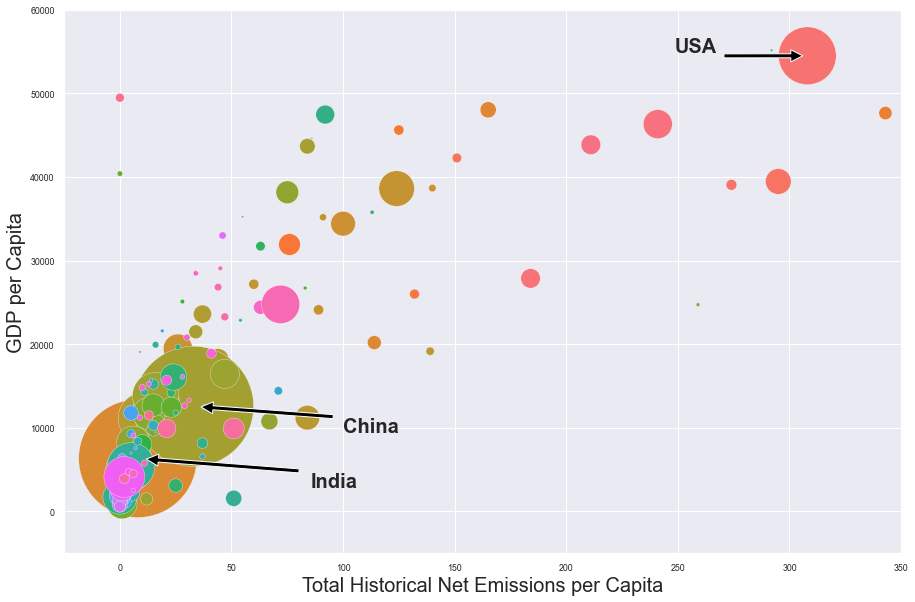

In [27]:

## -- Create Scatterplot of this -- ##

f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=.8) 
#ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
ax.set_xlabel('Total Historical Net Emissions per Capita',fontsize=20);
ax.set_ylabel('GDP per Capita',fontsize=20);

g = sns.scatterplot( ax=ax, data=tot_emissions, x='Total Emissions per Capita',
                    y= 'gdp/cap', hue='Country', 
                    s = tot_emissions['Population (Mil)']*10 ,  legend=False);
 
ax.set_xlim(-25, 350)
ax.set_ylim(-5000, 60000)


#Create annotations
ax.annotate('China', xy=(tot_emissions[tot_emissions['Country']=='CHN']['Total Emissions per Capita'], 
                          tot_emissions[tot_emissions['Country']=='CHN']['gdp/cap']),  
            xycoords='data',
            xytext=(0.4, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            weight='semibold', fontsize=20
            )

ax.annotate('USA', xy=(tot_emissions[tot_emissions['Country']=='USA']['Total Emissions per Capita'], 
                          tot_emissions[tot_emissions['Country']=='USA']['gdp/cap']),  
            xycoords='data',
            xytext=(0.78, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            weight='semibold', fontsize=20
            );

ax.annotate('India', xy=(tot_emissions[tot_emissions['Country']=='IND']['Total Emissions per Capita'], 
                          tot_emissions[tot_emissions['Country']=='IND']['gdp/cap']),  
            xycoords='data',
            xytext=(0.35, 0.15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            weight='semibold', fontsize=20
            );



### **Part 2 - Present of Climate Change**

**Graph 1 - Map of CO2 Emissions per capita**

In [28]:
#Make emissions per capita map

# -- Current Emissions Per Capita Dataframe Creation -- ##

ISO, country_name, gdp, pop, emissions, gdp_per_cap, e_per_cap, date_of_gdp = [  [],[],[],[],[],[], [], []   ]

#Loop through every country and compute emissions per capita and gdp per capita
for c in country_df['Country'].unique().tolist():
    try:
        subset = country_df[country_df['Country']==c]
        subset = subset.sort_values('Date').reset_index(drop=True)
        g1 = subset['gdp'][ subset[['gdp']].last_valid_index() ] 
        p1 = subset['population'][ subset[['population']].last_valid_index() ]  
        e1 =  subset['CO2_emission_total'][ subset[['CO2_emission_total']].last_valid_index() ]  
        gpc1 = g1 / p1 
        epc1 =  1000* e1 / p1

        gdp.append( g1 )
        pop.append( p1 )
        emissions.append( e1 )
        gdp_per_cap.append( gpc1 )
        e_per_cap.append( epc1  )
        ISO.append(c)
        country_name.append( subset['country_name'].iloc[0] )
        date_of_gdp.append( subset['Date'][ subset[['gdp']].last_valid_index() ] )
    except:
        None

#create df
e_per_cap = pd.DataFrame( {'ISO': ISO, 'country_name':country_name, 'GDP':gdp, 
                           'Population':pop, 'Emissions':emissions, 
                           'Emissions per Capita': e_per_cap, 'GDP pCap':gdp_per_cap, 'Date':date_of_gdp} )



#Create Bins for Emissions per Capita
bins = [0, .5, 1, 1.5, 2,3, 5,  50]
labels = ['0-.5', '.5-1', '1-1.5', '1.5-2', '2-3', '3-5', '5-10']
e_per_cap['e_binned'] = pd.cut(x = e_per_cap['Emissions per Capita'], 
                                bins = bins, labels = labels, include_lowest = True)
#Sort on emissions per capita
e_per_cap = e_per_cap.sort_values('Emissions per Capita')


# -- CREATE MAP -- ##
fig = px.choropleth( e_per_cap,
                    locations="ISO",
                    locationmode='ISO-3',
                    color="e_binned", 
                    hover_name="country_name",
                    #color_continuous_scale=px.colors.sequential.Blues,
                    #title=False,
                    color_discrete_sequence=px.colors.sequential.Blues)

#Update Legend
fig.update_layout( dict( legend_title_text='Emissions per Capita'))
fig.update_layout(legend=dict(title_font_family="Times New Roman",
                         font=dict(size= 8),   
                          yanchor="top",
                      y=0.55,
                  xanchor="left",
                  x=0.1 ) )

fig.show()


**Graph 2: Map of Natural Disasters by Country**

In [18]:
#REFINED MAP FOR NATURAL DISASTER IMPACTS WITH BINNED DATA
#----------------------------------------------------

#Add Country Name Column
def get_name(iso):
    try:
        name = pycountry.countries.get(alpha_3=iso).name
        return name
    except:
        return iso

#take subset of disaster data for all disasters from 2000-2021
recentDisasters = country_df[country_df.Date.dt.year >= 2000]

#groupby to get totals of impacted population
df = recentDisasters.groupby('Country')[['Number of people affected by disasters per 100,000']].sum()

#set index
df['Country'] = df.index

#Get country name 
df['country_name'] = df.apply(lambda row: get_name(row['Country']) , axis = 1)

#make copy
countryImpacts = df.copy()

#set bins
bins = [0,2500, 5000,7500, 10000,12500, 15000, 25000]

#set labels
labels = ['0-2500', '2500-5000','5000-7500', '7500-10000', '10000-12500','12500-15000', 'More than 15000']

#create binned data column
countryImpacts['impactsBinned'] = pd.cut(x = countryImpacts['Number of people affected by disasters per 100,000'], 
                                bins = bins, labels = labels, include_lowest = True)

#sort values
countryImpacts = countryImpacts.sort_values('Number of people affected by disasters per 100,000')

#create map
fig = px.choropleth( countryImpacts,
                    locations="Country",
                    locationmode='ISO-3',
                    color="impactsBinned", 
                    hover_name="country_name",
                    color_continuous_scale=px.colors.sequential.Reds,
                    #title=False,
                    color_discrete_sequence=px.colors.sequential.Reds)

#add title
fig.update_layout( dict( legend_title_text='Number of People Affected <br> by Disasters per 100,000 <br> 2000-2021'))

#add legend
fig.update_layout(legend=dict(title_font_family="Times New Roman",
                         font=dict(size= 8),   
                          yanchor="top",
                      y=0.55,
                  xanchor="left",
                  x=0.1 ) )

fig.show()

### **Part 3 - Future of Climate Change**

**Graph 1: Time Series of Renewable Adoption by Country**

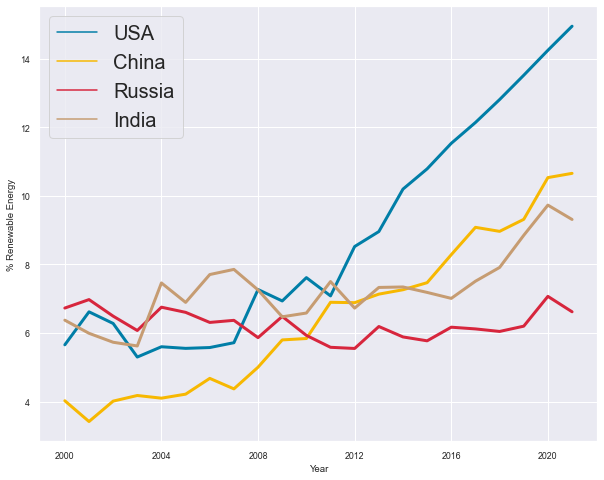

In [41]:
# Percent Share of Renewable Energy Time Series by Country

#Create pallette, country list
palette = sns.set_palette(sns.color_palette())
country_list = ['CHN', 'USA', 'RUS', 'IND']

#Subset the dataframe to be recent data with only countries we want
subset = country_df[country_df.Date.dt.year >= 2000]
subset = subset[ subset['Country'].isin(country_list) ]
subset = subset[['Date', 'renewables_share_energy', 'Country']]

#Replace ISO codes to names 
subset = subset.replace(to_replace= country_list[0:4], value=['USA', 'China', 'Russia', 'India'])

## -- CREATE PLOT -- ##
fig = plt.figure( figsize=(10, 8) )
sns.lineplot(data=subset, x='Date', y='renewables_share_energy', 
             hue='Country',
             hue_order= ['USA', 'China', 'Russia', 'India'],
            palette = {"China": "#F7B801", "India": "#C69C72", "USA": "#007EA7",
                       "Russia": "#D7263D", 'India':'#C69C72'},
             linewidth = 3
            )
plt.xlabel('Year'); plt.ylabel('% Renewable Energy')
plt.legend(loc=2, prop={'size': 20})


**Graph 2 - US Renewable Energy Prices Over Time**

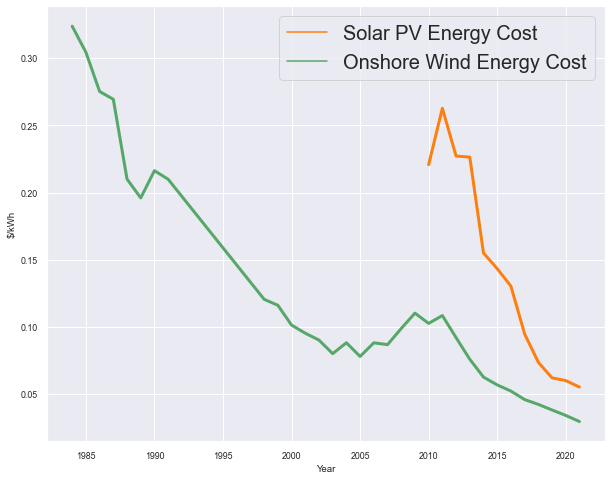

In [20]:
# US Renewable Energy Prices Over Time

#Subset dataframe to only have the US
US_costs = country_df[country_df['Country']=='USA']
US_costs.index = US_costs.Date.dt.year
US_costs = US_costs[['Solar PV Energy Cost', 'Onshore Wind Energy Cost']]
palette = {"Solar PV Energy Cost": "tab:orange", "Onshore Wind Energy Cost": "g"}
    
# Plot Data
fig = plt.figure( figsize=(10, 8) )
sns.lineplot(data=US_costs, dashes=False, palette = palette,
             hue_order = ['Solar PV Energy Cost', 'Onshore Wind Energy Cost'],
            linewidth = 3)
plt.xlabel("Year"); plt.ylabel("$/kWh")
plt.legend( prop={'size': 20})
plt.show()

**Graph 3 - Time Series of forecast for sectoral emissions in US**

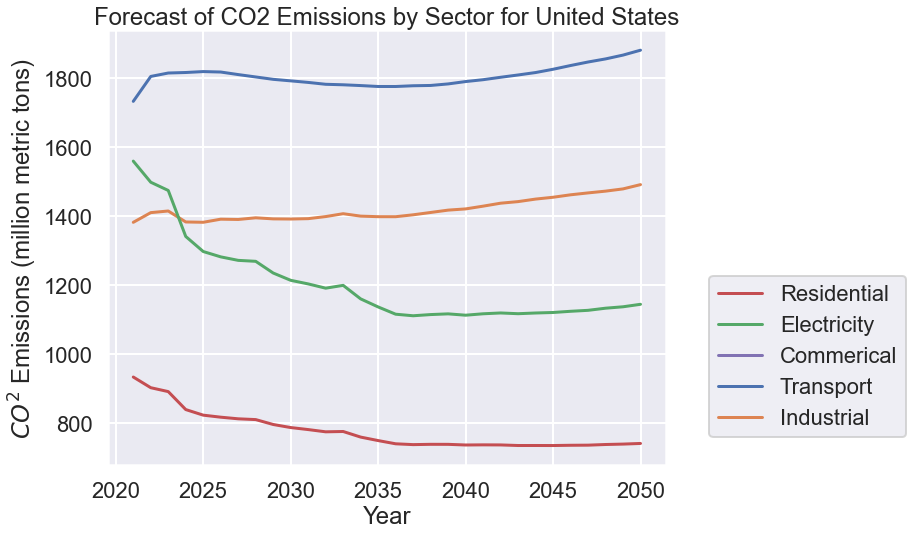

In [5]:
#read in USA sector emissions data
usa = pd.read_csv('usaForecastedData.csv')

usa.sort_values('Year',ascending=True, inplace=True)

usa.reset_index(inplace=True)

usa.set_index('Year', inplace=True)
#FORECAST OF CO2 FOR UNITED STATES PLOT
#--------------------------------------

#plotting usa sector emissions forecast
plt.figure( figsize=(10, 8) )
#usa.plot(x='Year')
sns.lineplot(data=usa, dashes=False,
             hue_order = ['Transport', 'Industrial', 'Electricity', 'Residential', 'Commerical'],
            linewidth = 3)

#add axis labels
plt.ylabel('$CO^2$ Emissions (million metric tons)')
plt.xlabel('Year')

#set legend
plt.legend(bbox_to_anchor = (1.2, .25), loc='center right')
plt.title('Forecast of CO2 Emissions by Sector for United States')

#changing order of legend
handles, labels = plt.gca().get_legend_handles_labels()

# specify order
order = [3,2, 4, 0, 1]
# pass handle & labels lists along with order
plt.legend([handles[i] for i in order], [labels[i] for i in order],
          bbox_to_anchor = (1.45, .25), loc='center right')

#set style
sns.set(style="whitegrid")
sns.set(context='poster')

# REFERENCES
Colors: https://matplotlib.org/stable/tutorials/colors/colors.html
<br>Replacing Names (country codes to country names): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
<br>Using hue_order to change order in legend: https://seaborn.pydata.org/generated/seaborn.barplot.html
<br>EDA Lecture 4, EDA Lecture 5, EDA Lecture 6
<br>https://community.plotly.com/t/how-do-i-set-the-order-of-categorical-elements-plotted-in-a-bar-chart/253/3
<br>https://plotly.com/python-api-reference/generated/plotly.express.area.html
<br>https://seaborn.pydata.org/generated/seaborn.set_context.html
<br>https://seaborn.pydata.org/generated/seaborn.plotting_context.html
<br>https://github.com/mwaskom/seaborn/issues/2301
<br>https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
<br>https://stackoverflow.com/questions/62131029/valueerror-s-must-be-a-scalar-or-the-same-size-as-x-and-y
<br>https://stackoverflow.com/questions/62667158/how-do-i-increase-the-line-thickness-of-my-seaborn-line
<br>https://stackoverflow.com/questions/25238442/setting-plot-background-colour-in-seaborn
<br>https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
<br>https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array